Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29757 entries, 0 to 29756
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            29757 non-null  int64  
 1   Card            29757 non-null  int64  
 2   Year            29757 non-null  int64  
 3   Month           29757 non-null  int64  
 4   Day             29757 non-null  int64  
 5   Time            29757 non-null  object 
 6   Amount          29757 non-null  object 
 7   Use Chip        29757 non-null  object 
 8   Merchant Name   29757 non-null  int64  
 9   Merchant City   29757 non-null  object 
 10  Merchant State  11408 non-null  object 
 11  Zip             4905 non-null   float64
 12  MCC             29757 non-null  int64  
 13  Errors?         1286 non-null   object 
 14  Is Fraud?       29757 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 3.4+ MB

First 5 Rows:
   User  Card  Year 

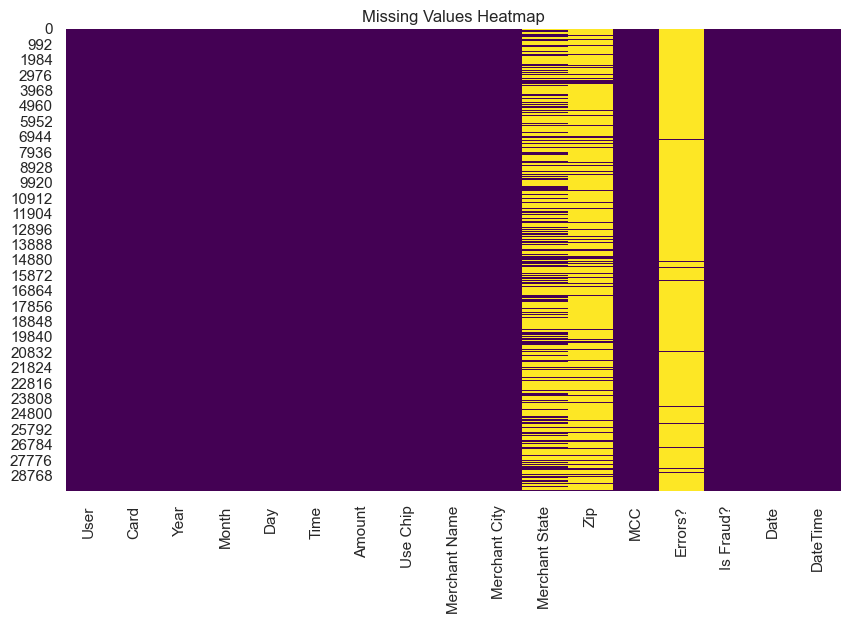

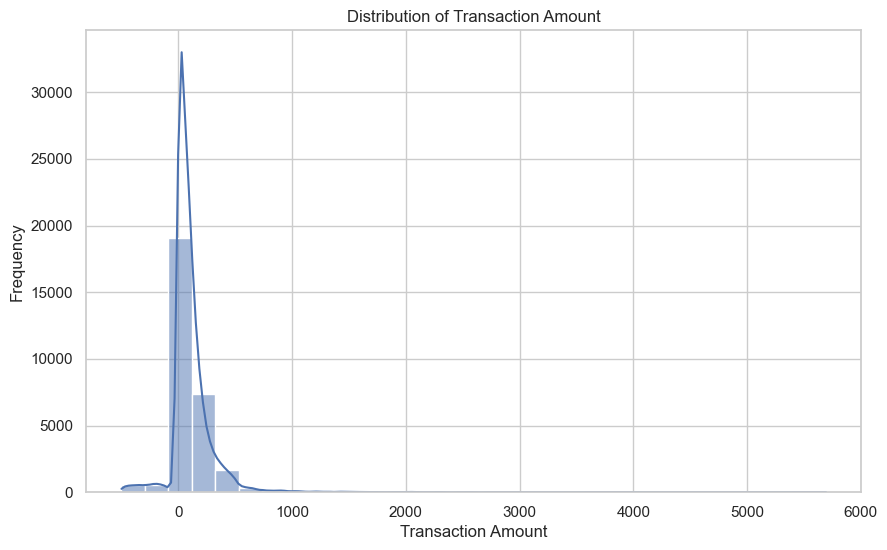

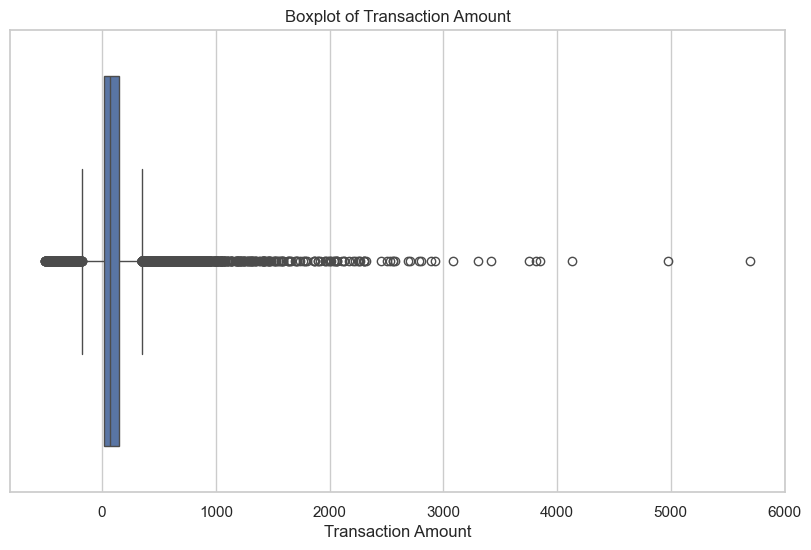

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_16980\2141266763.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=df, palette="Blues")


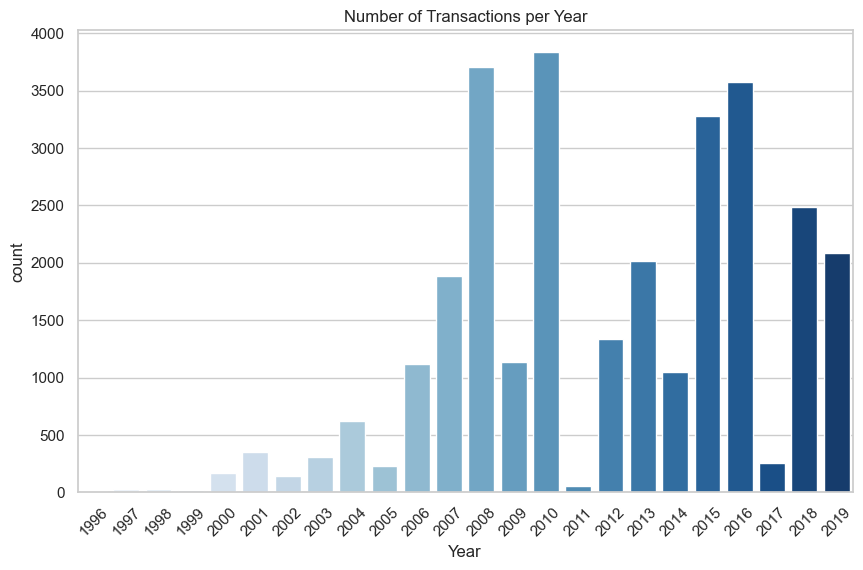

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_16980\2141266763.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, palette="Greens")


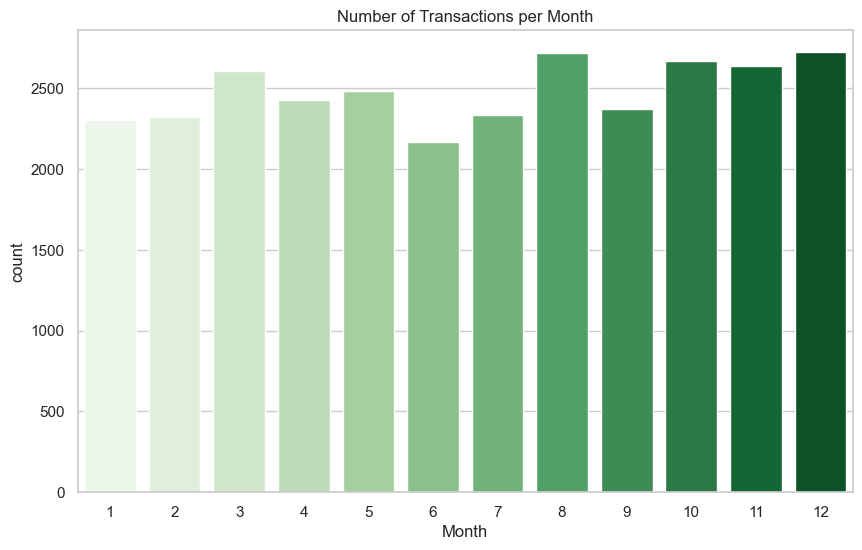

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_16980\2141266763.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Use Chip", data=df, palette="magma")


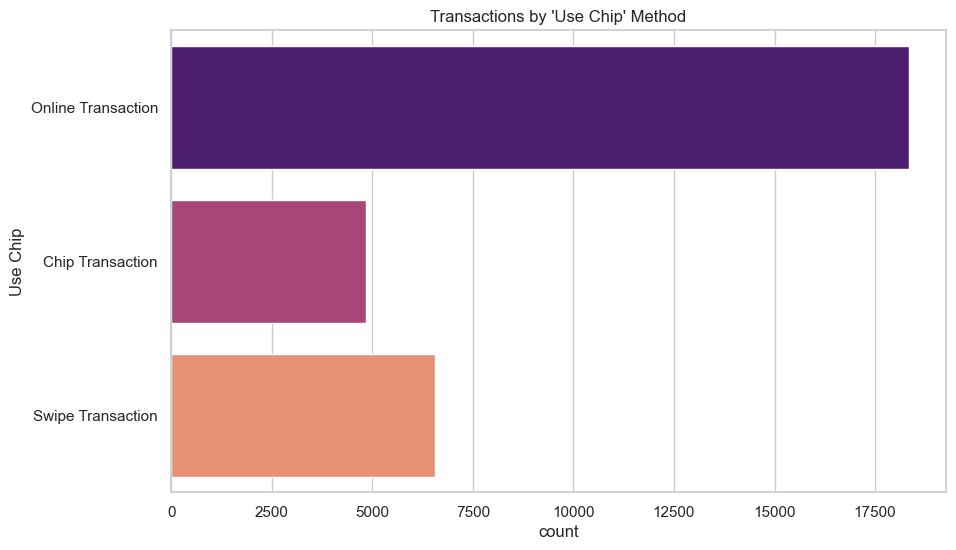

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_16980\2141266763.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Merchant City", data=df, order=order, palette="coolwarm")


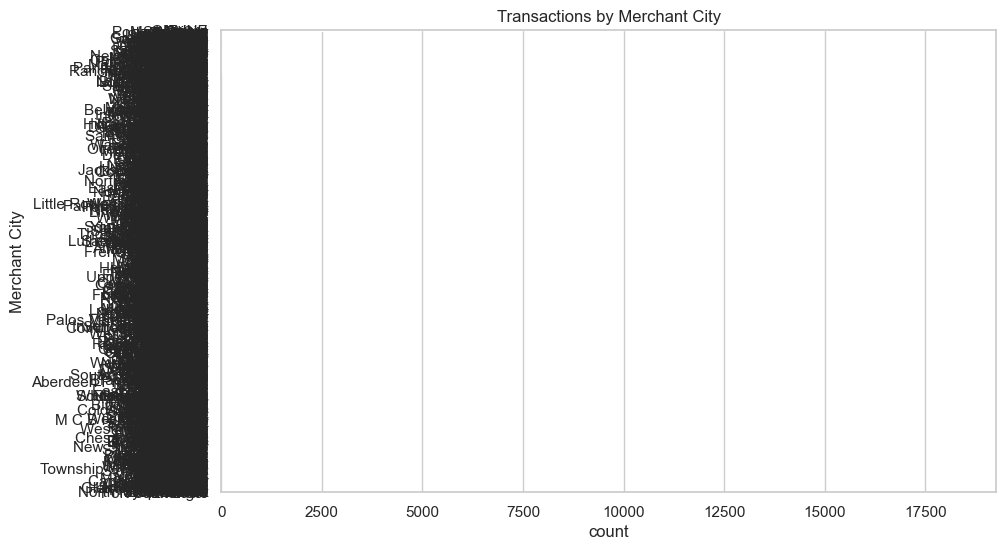

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_16980\2141266763.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Merchant State", data=df, palette="Spectral")


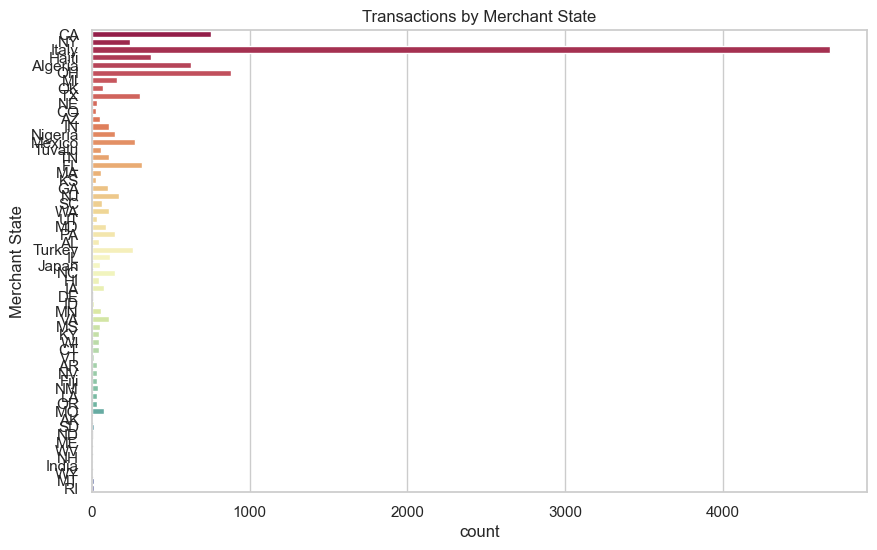

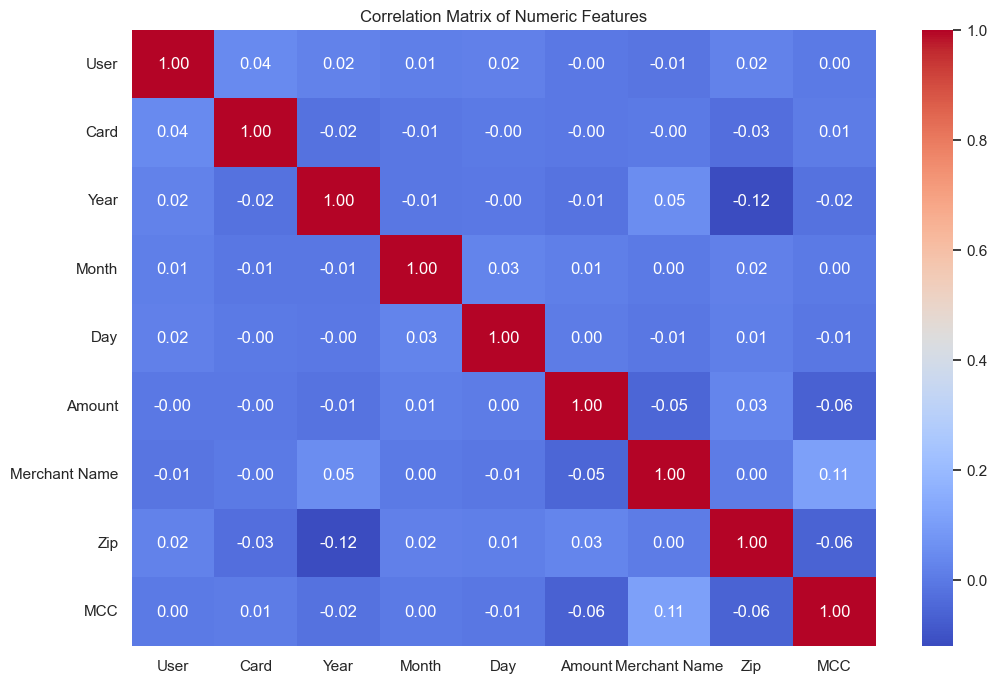

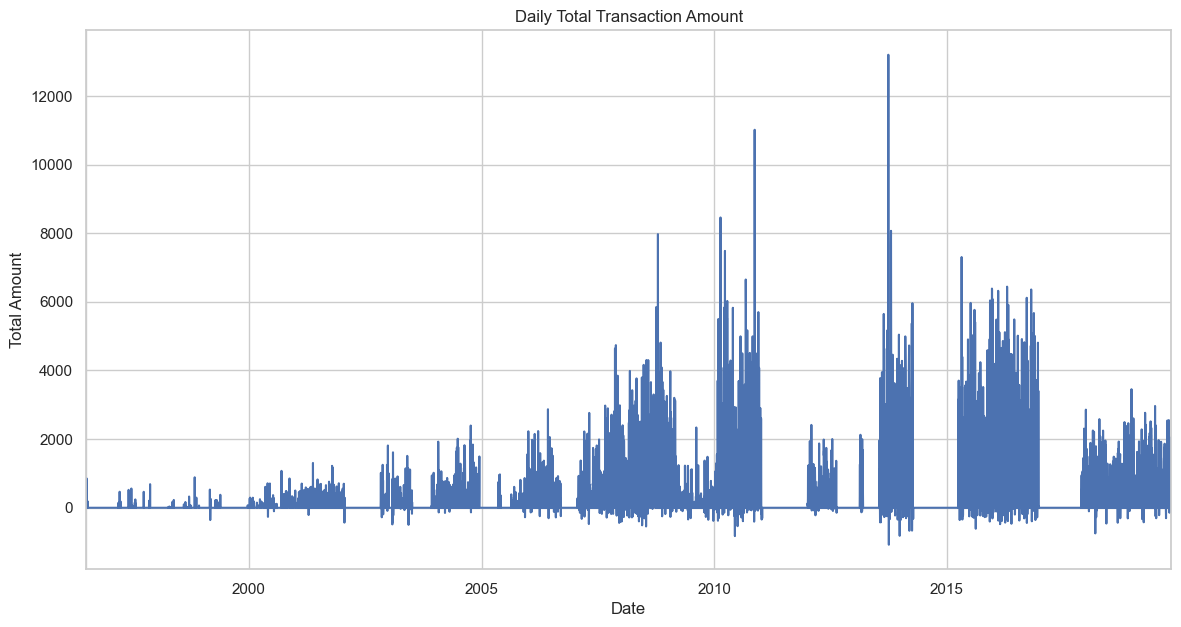

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ----------------------------
# 1. Load the Dataset
# ----------------------------
file_path = "./fraud-yes.csv"
df = pd.read_csv(file_path)

# Display initial information
print("Initial Dataset Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())
print("\nSummary Statistics (Numeric Columns):")
print(df.describe())

# ----------------------------
# 2. Data Cleaning & Transformation
# ----------------------------

# Clean the 'Amount' column: Remove dollar signs and convert to float
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Create a proper datetime column by combining Year, Month, Day, and Time
# First, create a date from Year, Month, and Day
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
# Then, combine the date with the Time column to create a full datetime
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# ----------------------------
# 3. Exploratory Data Analysis (EDA)
# ----------------------------

# 3.1. Visualize Missing Values with a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3.2. Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Transaction Amount to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.show()

# 3.3. Transactions Over Time
# Count transactions by Year
plt.figure(figsize=(10, 6))
sns.countplot(x="Year", data=df, palette="Blues")
plt.title("Number of Transactions per Year")
plt.xticks(rotation=45)
plt.show()

# Count transactions by Month (aggregated over all years)
plt.figure(figsize=(10, 6))
sns.countplot(x="Month", data=df, palette="Greens")
plt.title("Number of Transactions per Month")
plt.show()

# 3.4. Transaction Methods: 'Use Chip'
plt.figure(figsize=(10, 6))
sns.countplot(y="Use Chip", data=df, palette="magma")
plt.title("Transactions by 'Use Chip' Method")
plt.show()

# 3.5. Merchant Information: City and State
# Merchant City distribution
plt.figure(figsize=(10, 6))
order = df['Merchant City'].value_counts().index
sns.countplot(y="Merchant City", data=df, order=order, palette="coolwarm")
plt.title("Transactions by Merchant City")
plt.show()

# Merchant State distribution (note: many missing values)
plt.figure(figsize=(10, 6))
sns.countplot(y="Merchant State", data=df, palette="Spectral")
plt.title("Transactions by Merchant State")
plt.show()

# 3.6. Correlation Analysis among Numeric Variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# 3.7. Time Series Analysis: Daily Total Transaction Amount
# Set the DateTime column as the index
df.set_index("DateTime", inplace=True)
daily_amount = df['Amount'].resample('D').sum()

plt.figure(figsize=(14, 7))
daily_amount.plot()
plt.title("Daily Total Transaction Amount")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

# Reset the index if you need to work with the DataFrame later in its original form
df.reset_index(inplace=True)
